The goal is to perform DBSCAN across many epsilons for 1 system dataset (eg, demand_data.csv, fuels.csv, ...), identify similar consecutive hours, merge consecutive similar hours into new timeseries files, and save the newly generated time series data 


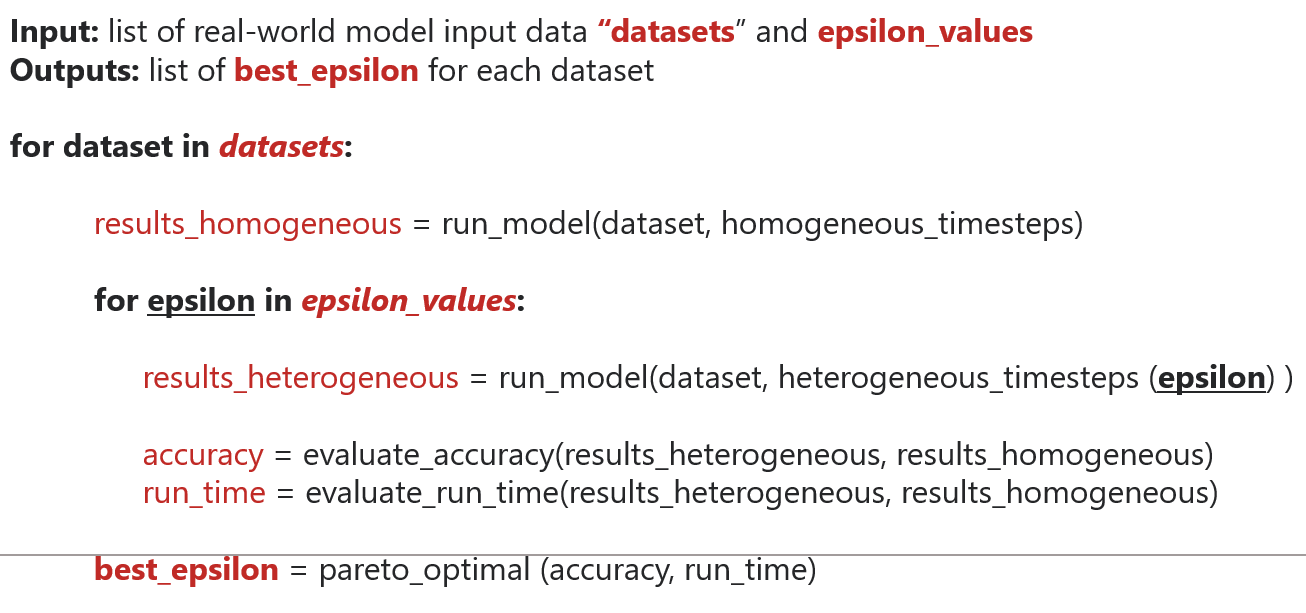


- Expected Output:
  - Set of folders ending with the corresponding epsilon saved containing many csv files

# 1. Load HO data and input data(epsilons to test)

In [1]:
#Input Data
path = r"C:\Users\Diego\GenX\GenX.jl-main\example_systems\11_New_England_200928h\system"
# epsilon_values = [1.        , 0.98990909, 0.97981818, 0.96972727, 0.95963636, 
#  0.94954545, 0.93945455, 0.92936364, 0.91927273, 0.90918182, 
#  0.89909091, 0.889     , 0.87890909, 0.86881818, 0.85872727, 
#  0.84863636, 0.83854545, 0.82845455, 0.81836364, 0.80827273, 
#  0.79818182, 0.78809091, 0.778     , 0.76790909, 0.75781818, 
#  0.74772727, 0.73763636, 0.72754545, 0.71745455, 0.70736364, 
#  0.69727273, 0.68718182, 0.67709091, 0.667     , 0.65690909, 
#  0.64681818, 0.63672727, 0.62663636, 0.61654545, 0.60645455, 
#  0.59636364, 0.58627273, 0.57618182, 0.56609091, 0.556     , 
#  0.54590909, 0.53581818, 0.52572727, 0.51563636, 0.50554545, 
#  0.49545455, 0.48536364, 0.47527273, 0.46518182, 0.45509091, 
#  0.445     , 0.43490909, 0.42481818, 0.41472727, 0.40463636, 
#  0.39454545, 0.38445455, 0.37436364, 0.36427273, 0.35418182, 
#  0.34409091, 0.334     , 0.32390909, 0.31381818, 0.30372727, 
#  0.29363636, 0.28354545, 0.27345455, 0.26336364, 0.25327273, 
#  0.24318182, 0.23309091, 0.223     , 0.21290909, 0.20281818, 
#  0.19272727, 0.18263636, 0.17254545, 0.16245455, 0.15236364, 
#  0.14227273, 0.13218182, 0.12209091, 0.112     , 0.10190909, 
#  0.09181818, 0.08172727, 0.07163636, 0.06154545, 0.05145455, 
#  0.04136364, 0.03127273, 0.02118182, 0.01109091, 0.001     ]

# epsilon_values = [1.        , 0.98990909, 0.97981818, 0.96972727, 0.95963636, 
#  0.94954545, 0.93945455, 0.92936364, 0.91927273, 0.90918182, 
#  0.89909091, 0.889     , 0.87890909, 0.86881818, 0.85872727, 
#  0.84863636, 0.83854545, 0.82845455, 0.81836364, 0.80827273, 
#  0.79818182, 0.78809091, 0.778     , 0.76790909, 0.75781818, 
#  0.74772727, 0.73763636, 0.72754545, 0.71745455, 0.70736364, 
#  0.69727273, 0.68718182, 0.67709091, 0.667     , 0.65690909, 
#  0.64681818, 0.63672727, 0.62663636, 0.61654545, 0.60645455, 
#  0.59636364, 0.58627273, 0.57618182, 0.56609091, 0.556     , 
#  0.54590909, 0.53581818, 0.52572727, 0.51563636, 0.50554545, 
#  0.49545455, 0.48536364, 0.47527273, 0.46518182, 0.45509091, 
#  0.445     , 0.43490909, 0.42481818, 0.41472727, 0.40463636, 
#  0.39454545, 0.38445455, 0.37436364, 0.36427273, 0.35418182, 
#  0.34409091, 0.334     , 0.32390909, 0.31381818, 0.30372727, 
#  0.29363636, 0.28354545, 0.27345455, 0.26336364, 0.25327273, 
#  0.24318182, 0.23309091, 0.223     , 0.21290909, 0.20281818, 
#  0.19272727, 0.18263636, 0.17254545, 0.16245455, 0.15236364, 
#  0.14227273, 0.13218182, 0.12209091, 0.112     , 0.10190909, 
#  0.09181818, 0.08172727, 0.07163636, 0.06154545, 0.05145455, 
#  0.04136364, 0.03127273, 0.02118182, 0.01109091, 0.001     ]


# epsilon_values = [0.001     , 0.00714915, 0.0132983 , 0.9824893 , 1.        ]

# epsilon_values = [0.001     , 0.00714915, 0.0132983 , 0.01944744, 0.02559659,
#        0.03174574, 0.03789489, 0.04404403, 0.05019318, 0.05634233,
#        0.06249148, 0.06864062, 0.07478977, 0.08093892, 0.08708807,
#        0.09323721, 0.09938636, 0.10553551, 0.11168466, 0.11783381,
#        0.12398295, 0.1301321 , 0.13628125, 0.1424304 , 0.14857954,
#        0.15472869, 0.16087784, 0.16702699, 0.17317613, 0.17932528,
#        0.18547443, 0.19162358, 0.19777273, 0.20392187, 0.21007102,
#        0.21622017, 0.22236932, 0.22851846, 0.23466761, 0.24081676,
#        0.24696591, 0.25311505, 0.2592642 , 0.26541335, 0.2715625 ,
#        0.27771164, 0.28386079, 0.29000994, 0.29615909, 0.30230824,
#        0.30845738, 0.31460653, 0.32075568, 0.32690483, 0.33305397,
#        0.33920312, 0.34535227, 0.35150142, 0.35765056, 0.36379971,
#        0.36994886, 0.37609801, 0.38224715, 0.3883963 , 0.39454545,
#        0.40463636, 0.42214706, 0.43965775, 0.45716845, 0.47467914,
#        0.49218984, 0.50970053, 0.52721123, 0.54472192, 0.56223262,
#        0.57974331, 0.59725401, 0.6147647 , 0.6322754 , 0.64978609,
#        0.66729679, 0.68480748, 0.70231818, 0.71982888, 0.73733957,
#        0.75485027, 0.77236096, 0.78987166, 0.80738235, 0.82489305,
#        0.84240374, 0.85991444, 0.87742513, 0.89493583, 0.91244652,
#        0.92995722, 0.94746791, 0.96497861, 0.9824893 , 1.        ]

# 100 epsilons NE case
# epsilon_values = [0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
#        0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
#        0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
#        0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
#        0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
#        0.25327273, 0.26336364, 0.27345455, 0.28354545, 0.29363636,
#        0.30372727, 0.31381818, 0.32390909, 0.334     , 0.34409091,
#        0.35418182, 0.36427273, 0.37436364, 0.38445455, 0.39454545,
#        0.40463636, 0.41472727, 0.42481818, 0.43490909, 0.445     ,
#        0.45509091, 0.46518182, 0.47527273, 0.48536364, 0.49545455,
#        0.50554545, 0.51563636, 0.52572727, 0.53581818, 0.54590909,
#        0.556     , 0.56609091, 0.57618182, 0.58627273, 0.59636364,
#        0.60645455, 0.61654545, 0.62663636, 0.63672727, 0.64681818,
#        0.65690909, 0.667     , 0.67709091, 0.68718182, 0.69727273,
#        0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
#        0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
#        0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
#        0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
#        0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
#        0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]

epsilon_values_missing_6_of_17eps_NE_case = [0.20281818, 0.21290909, 0.33305397, 0.35150142, 0.38224715, 0.40463636, 0.45716845]

epsilon_values = epsilon_values_missing_6_of_17eps_NE_case

In [3]:
# import os
# import pandas as pd

# base_directory = r"C:\Users\Diego\GenX\GenX.jl-main\example_systems\11_New_England_200928h\system_epsilon"

# for eps in epsilon_values:
#     path_fuels = os.path.join(base_directory, f"system_epsilon_{eps}", "Fuels_data.csv")
#     df_fuel = pd.read_csv(path_fuels)
    
#     # Select the last column and delete it
#     col_to_delete = df_fuel.columns[-1]
#     df_fuel.drop(columns=col_to_delete, inplace=True)
    
#     # Save the modified dataframe back to the CSV file
#     df_fuel.to_csv(path_fuels, index=False)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import os
import math
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import itertools
import shutil

In [5]:
p_demand = "Demand_data.csv"
p_fuel = "Fuels_data.csv"
p_CF = "Generators_variability.csv"
p_network = "Network.csv"

path_demand = os.path.join(path, p_demand)
path_fuel = os.path.join(path, p_fuel)
path_CF = os.path.join(path, p_CF)
path_network = os.path.join(path, p_network)

df_demand = pd.read_csv(path_demand)
df_fuel = pd.read_csv(path_fuel)
df_CF = pd.read_csv(path_CF)

In [8]:
selected_demand_columns = [col for col in df_demand.columns if (col.startswith("Demand") or col == "Time_Index") and (col != "Demand_Segment")]
selected_fuel_columns = [col for col in df_fuel.columns if ((col != "Time_Index") and (col!="None"))]
selected_CF_columns = [col for col in df_CF.columns if (col != "Time_Index") and (col!="None")]


df_demand_values = df_demand[selected_demand_columns]
df_fuel_values = df_fuel[selected_fuel_columns].drop(index=0).reset_index().drop(columns=["index"])
df_CF_values = df_CF[selected_CF_columns]

df_tot = pd.concat([df_demand_values, df_fuel_values , df_CF_values], axis=1)
df_tot.head(3)

,Time_Index,Demand_MW_z1,NG,nuclear_fuel,NGCCS,natural_gas,natural_gas_ccs,solar_pv,onshore_wind,fixed_offshore_wind,float_offshore_wind,battery,ror_hydro,pumped_hydro,nuclear_CF
0,1,12774.356,8.661,0.66,9.61608,1,1,0.0,0.3849,0.1182,0.1182,1,0.552744,1,1
1,2,12270.879,8.661,0.66,9.61608,1,1,0.0,0.3708,0.1128,0.1128,1,0.552744,1,1
2,3,11954.372,8.661,0.66,9.61608,1,1,0.0,0.4552,0.0904,0.0904,1,0.552744,1,1


# 2. Run DBSCAN for varying epsilons

In [10]:
# Normalize the data excluding the 'Time_Index' column
scaler = StandardScaler()
df_tot_normalized = scaler.fit_transform(df_tot.drop(columns=['Time_Index']))
df_tot_normalized_df = pd.DataFrame(df_tot_normalized, columns=df_tot.columns.drop('Time_Index'))

# Initialize list to store major results for each epsilon
epsilon_main_clustering_results = []

# Save unnormalized data with it's corresponding cluster attribution for each epsilon
df_tot_eps = {}
size_set_consecutive_indices ={} 

# First pass to find global axis limits for the x-axes
all_cluster_sizes = []
all_cluster_variances = []

for eps in epsilon_values:
    set_consecutive_indices_size_eps = []
    row_indexes_to_drop = []

    ## Step 0: Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=2)
    labels = dbscan.fit_predict(df_tot_normalized)

    ## Step 1: Save clustering results for further analysis if needed, before input data manipulation using clustering results
    # Create a DataFrame to store clustering results for this epsilon
    df_epsilon = df_tot_normalized_df.copy()
    df_epsilon['Cluster'] = labels

    #Save cluster assignment in unnormalized data
    df_tot['Cluster'] = labels
    df_tot["Rel_TimeStep"] = 1
    df_tot_eps[eps] = df_tot.copy()
    df_tot.drop(columns=['Cluster', 'Rel_TimeStep'], inplace=True)
    
    # Collect cluster sizes and variance of the NORMALIZED DATA within each cluster
    cluster_sizes = df_epsilon[df_epsilon['Cluster'] != -1]['Cluster'].value_counts()
    cluster_variances = df_epsilon[df_epsilon['Cluster'] != -1].groupby('Cluster').var().mean(axis=1)
    all_cluster_sizes.extend(cluster_sizes)
    all_cluster_variances.extend(cluster_variances)
    
    # Store the major clustering results for each DBSCAN run with different epsilons
    result = {
        'Epsilon': eps,
        'Num_Clusters': len(cluster_sizes),
        'Median_Cluster_Size': cluster_sizes.median()
    }
    epsilon_main_clustering_results.append(result)

    ## Step 2: Merge consecutive hours within the input data
    # Identify clusters with at least one consecutive pair of hours

    for label in set(labels):
        if label != -1:
            cluster_group = df_tot_eps[eps][df_tot_eps[eps]['Cluster'] == label]
            cluster_group = cluster_group.sort_values(by="Time_Index", ascending=True) #Make sure data is ordered in an ascending order based on the Time_Index value

            consecutive_indices_cluster = [] # cluster_groupAll sets of consecutive indices within the same cluster
            index_consecutive_indices_to_merge = [] # df_tot index of one set of consecutuve indices within the same cluster

            for i in range(len(cluster_group) - 1):
                if cluster_group['Time_Index'].iloc[i] + 1 == cluster_group['Time_Index'].iloc[i + 1]:
                    consecutive_indices_cluster.append(cluster_group.index[i])
                    index_consecutive_indices_to_merge.append(cluster_group.index[i])

                    if (i <= len(cluster_group)-3) and (not (cluster_group['Time_Index'].iloc[i+1] + 1 == cluster_group['Time_Index'].iloc[i + 2])):
                        consecutive_indices_cluster.append(cluster_group.index[i+1])
                        index_consecutive_indices_to_merge.append(cluster_group.index[i+1])
                        set_consecutive_indices_size_eps.append(len(index_consecutive_indices_to_merge))

                        # Replace data from sets of consecutive hours with average values
                        mean_row = df_tot_eps[eps].loc[index_consecutive_indices_to_merge].mean()
                        mean_row["Rel_TimeStep"] = len(index_consecutive_indices_to_merge)
                        index_row_to_keep = index_consecutive_indices_to_merge[0]
                        df_tot_eps[eps].loc[index_row_to_keep] = mean_row

                        #Update the list of rows to remove as these rows are replaced by the average values across them
                        index_row_to_remove = index_consecutive_indices_to_merge[1:]
                        row_indexes_to_drop.append(index_row_to_remove)

                        index_consecutive_indices_to_merge = []

                    if i == len(cluster_group) - 2:
                        consecutive_indices_cluster.append(cluster_group.index[i + 1])
                        index_consecutive_indices_to_merge.append(cluster_group.index[i+1])
                        set_consecutive_indices_size_eps.append(len(index_consecutive_indices_to_merge))

                        # Replace data from sets of consecutive hours with average values
                        mean_row = df_tot_eps[eps].loc[index_consecutive_indices_to_merge].mean()
                        mean_row["Rel_TimeStep"] = len(index_consecutive_indices_to_merge)
                        index_row_to_keep = index_consecutive_indices_to_merge[0]
                        df_tot_eps[eps].loc[index_row_to_keep] = mean_row

                        #Update the list of rows to remove as these rows are replaced by the average values across them
                        index_row_to_remove = index_consecutive_indices_to_merge[1:]
                        row_indexes_to_drop.append(index_row_to_remove)

                        index_consecutive_indices_to_merge = []

    # Remove all rows that were replaced by the average value of the set of consecutive hours within the same cluster
    row_indexes_to_drop = list(itertools.chain(*row_indexes_to_drop))
    df_tot_eps[eps].drop(row_indexes_to_drop, inplace=True)

    # Reset "Time_Index" values
    df_tot_eps[eps]["Time_Index"] = range(1, len(df_tot_eps[eps])+1, 1)

    size_set_consecutive_indices[eps] = set_consecutive_indices_size_eps

C:\Users\Diego\AppData\Local\Temp\ipykernel_29332\516722615.py:75: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_tot_eps[eps].loc[index_row_to_keep] = mean_row
C:\Users\Diego\AppData\Local\Temp\ipykernel_29332\516722615.py:75: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_tot_eps[eps].loc[index_row_to_keep] = mean_row
C:\Users\Diego\AppData\Local\Temp\ipykernel_29332\516722615.py:75: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '191.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_tot_eps[eps].loc[index_row_to_keep] = mean_row
C:\Users\Di

In [6]:
df_tot_eps

{1.0:         Time_Index  Demand_MW_z1        NG  nuclear_fuel     NGCCS  \
 0                1  15866.472821  8.477814          0.66  9.432894   
 1416             2  14348.544599  7.424000          0.66  8.379080   
 2160             3  14478.655194  6.701794          0.66  7.656874   
 7296             4  14275.270669  7.520000          0.66  8.475080   
 8016             5  15830.591000  8.249710          0.66  9.204790   
 ...            ...           ...       ...           ...       ...   
 182736         122  14184.264391  8.396303          0.66  9.351383   
 184872         123  13564.166463  6.872465          0.66  7.827545   
 191472         124  14451.905131  8.396303          0.66  9.351383   
 193608         125  13562.548509  6.872465          0.66  7.827545   
 200208         126  13904.351642  8.236000          0.66  9.191080   
 
         natural_gas  natural_gas_ccs  solar_pv  onshore_wind  \
 0                 1                1  0.073076      0.508958   
 1416      

## 3. Save the results

In [11]:
selected_demand_columns.append("Rel_TimeStep")
df_demand_core = df_demand[df_demand.columns.difference(selected_demand_columns)]

selected_fuel_columns.append("Time_Index")
df_fuel_core = df_fuel.iloc[:1]

selected_CF_columns.append("Time_Index")

for eps in epsilon_values:
    ## Step 1: Save modified date under the same format as the original df
    #Demand.csv
    df_demand_modified = df_tot_eps[eps][selected_demand_columns].reset_index(drop=True)
    df_demand_eps = pd.concat([df_demand_core, df_demand_modified], axis=1)

    #Fuel.csv
    df_fuel_modified = df_tot_eps[eps][selected_fuel_columns]
    df_fuel_modified.index = df_fuel_modified.reset_index(drop=True).index +1
    # df_fuel_eps = pd.concat([df_fuel_core, df_fuel_modified]).drop("None", axis=1)
    df_fuel_eps = pd.concat([df_fuel_core, df_fuel_modified])

    # Generators_variability.csv
    df_CF_eps = df_tot_eps[eps][selected_CF_columns].reset_index(drop=True)

    ## Step 2: Create a directory and save the data
    path_eps= os.path.join(path + "_epsilon_missing_6_of17eps", "system_epsilon_"+ str(eps))
    os.makedirs(path_eps, exist_ok=True)

    # Save the DataFrame as a CSV file in the directory
    path_demand_eps = os.path.join(path_eps, "Demand_data.csv")
    path_fuel_eps = os.path.join(path_eps, "Fuels_data.csv")
    path_CF_eps = os.path.join(path_eps, "Generators_variability.csv")
    path_network_eps = os.path.join(path_eps, "Network.csv")

    df_demand_eps.to_csv(path_demand_eps, index=False)
    df_fuel_eps.to_csv(path_fuel_eps, index=False)
    df_CF_eps.to_csv(path_CF_eps, index=False)
    if os.path.isfile(path_network):
        shutil.copy(path_network, path_network_eps)